# Spatio-temporal analysis

In [1]:
import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To this end, we can use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In this case, we will use the three extracts of the Canton of Vaud from the [CORINE Land Cover datasets](https://land.copernicus.eu/pan-european/corine-land-cover) for the years 2000, 2006 and 2012.

In [2]:
input_filepaths = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=[2000, 2006, 2012])

## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which can be computed by means of its methods `compute_class_metrics_df` and `compute_landscape_metrics_df` respectively. For instance, a data frame of the class-level metrics can be obtained as follows:

In [3]:
class_metrics_df = sta.compute_class_metrics_df()
class_metrics_df.head()

metric          total_area proportion_of_landscape number_of_patches  \
class_val dates                                                        
1         2000       24729                 7.70194               193   
          2006       24599                 7.66145               200   
          2012       24766                 7.71346               201   
2         2000      296346                 92.2981                13   
          2006      296476                 92.3386                 8   

metric          patch_density largest_patch_index  total_edge edge_density  \
class_val dates                                                              
1         2000      0.0601106             2.06992  1.4316e+06      4.45877   
          2006      0.0622907             2.02227   1.436e+06      4.47248   
          2012      0.0626022             2.02227  1.4459e+06      4.50331   
2         2000      0.0040489             89.4514  1.4316e+06      4.45877   
          2006     0.00249163             89.1318   1.436e+06      4.47248   

metric          landscape_shape_index  area_mn  area_am  ...  \
class_val dates                                          ...   
1         2000                22.9492   128.13  2201.71  ...   
          2006                23.0892  122.995  2031.22  ...   
          2012                 23.181  123.214  2019.46  ...   
2         2000                10.0533  22795.8   278596  ...   
          2006                10.0744  37059.5   276495  ...   

metric          fractal_dimension_md fractal_dimension_ra  \
class_val dates                                             
1         2000               1.08167             0.200096   
          2006               1.08076             0.195545   
          2012               1.07917             0.195545   
2         2000               1.06999             0.206571   
          2006               1.08792             0.194132   

metric          fractal_dimension_sd fractal_dimension_cv  \
class_val dates                                             
1         2000             0.0357722              3.29813   
          2006               0.03525              3.25178   
          2012             0.0347995              3.20964   
2         2000             0.0568234              5.32212   
          2006             0.0548953              5.01883   

metric          euclidean_nearest_neighbor_mn euclidean_nearest_neighbor_am  \
class_val dates                                                               
1         2000                        1023.35                       707.998   
          2006                        1003.28                        703.96   
          2012                        1005.07                       703.368   
2         2000                        246.646                       202.443   
          2006                        239.112                       202.436   

metric          euclidean_nearest_neighbor_md euclidean_nearest_neighbor_ra  \
class_val dates                                                               
1         2000                        781.025                       6772.09   
          2006                         721.11                       6772.09   
          2012                        728.011                       6772.09   
2         2000                        223.607                       116.228   
          2006                        223.607                           100   

metric          euclidean_nearest_neighbor_sd euclidean_nearest_neighbor_cv  
class_val dates                                                              
1         2000                        879.913                       85.9832  
          2006                        883.732                       88.0845  
          2012                        877.435                       87.3013  
2         2000                        38.3861                       15.5632  
          2006                        39.6897                      

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 2000

In [4]:
class_metrics_df.loc[(1, 2000)]

metric
total_area                            24729
proportion_of_landscape             7.70194
number_of_patches                       193
patch_density                     0.0601106
largest_patch_index                 2.06992
total_edge                       1.4316e+06
edge_density                        4.45877
landscape_shape_index               22.9492
area_mn                              128.13
area_am                             2201.71
area_md                                  43
area_ra                                6645
area_sd                             515.449
area_cv                             402.287
perimeter_mn                        7491.19
perimeter_am                        58359.4
perimeter_md                           4400
perimeter_ra                         147400
perimeter_sd                          13298
perimeter_cv                        177.515
perimeter_area_ratio_mn             107.149
perimeter_area_ratio_am             58.4658
perimeter_area_ratio_md  

Similarly, the data frame of landscape metrics can be obtained as follows:

In [5]:
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,321075,206,0.0641595,89.4514,1.4316e+06,4.45877,9.71693,1558.62,257309,43,...,0.0376779,3.47726,974.339,241.38,700,6772.09,872.438,89.5415,73.4018,0.271429
2006,321075,208,0.0647824,89.1318,1.436e+06,4.47248,9.73633,1543.63,255467,45,...,0.0362519,3.34304,973.887,240.86,714.109,6772.09,878.977,90.2545,73.4629,0.270422
2012,321075,209,0.0650938,89.0916,1.4459e+06,4.50331,9.77998,1536.24,255235,45,...,0.0358375,3.30423,975.747,241.066,721.11,6772.09,872.972,89.4671,73.3309,0.271715


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics by passing them to the `metrics` keyword argument of the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, as in:

In [6]:
metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am']
sta.compute_class_metrics_df(metrics=metrics)

metric          proportion_of_landscape edge_density fractal_dimension_am
class_val dates                                                          
1         2000                  7.70194      4.45877              1.12956
          2006                  7.66145      4.47248              1.12336
          2012                  7.71346      4.50331              1.12347
2         2000                  92.2981      4.45877                1.204
          2006                  92.3386      4.47248                1.203
          2012                  92.2865      4.50331              1.20344

At the class-level, we can choose to compute the metrics only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [7]:
sta.compute_class_metrics_df(metrics=metrics, classes=[1])

metric          proportion_of_landscape edge_density fractal_dimension_am
class_val dates                                                          
1         2000                  7.70194      4.45877              1.12956
          2006                  7.66145      4.47248              1.12336
          2012                  7.71346      4.50331              1.12347

In both the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, we can also customize how some metrics are computed through the `metrics_kws` argument:

In [8]:
metrics_kws={
    'proportion_of_landscape': {'percent': False},
    'edge_density': {'count_boundary': True}
}
sta.compute_class_metrics_df(
    metrics=metrics, classes=[1], metrics_kws=metrics_kws)

metric          proportion_of_landscape edge_density fractal_dimension_am
class_val dates                                                          
1         2000                0.0770194        4.503              1.12956
          2006                0.0766145      4.51608              1.12336
          2012                0.0771346      4.54847              1.12347

On the other hand, the `dates` keyword argument might also be provided as string or `datetime` objects, e.g.:

In [9]:
import datetime

dates = [datetime.date(year, 1, 1) for year in [2000, 2006, 2012]]
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=dates)
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000-01-01,321075,206,0.0641595,89.4514,1.4316e+06,4.45877,9.71693,1558.62,257309,43,...,0.0376779,3.47726,974.339,241.38,700,6772.09,872.438,89.5415,73.4018,0.271429
2006-01-01,321075,208,0.0647824,89.1318,1.436e+06,4.47248,9.73633,1543.63,255467,45,...,0.0362519,3.34304,973.887,240.86,714.109,6772.09,878.977,90.2545,73.4629,0.270422
2012-01-01,321075,209,0.0650938,89.0916,1.4459e+06,4.50331,9.77998,1536.24,255235,45,...,0.0358375,3.30423,975.747,241.066,721.11,6772.09,872.972,89.4671,73.3309,0.271715


## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

/home/martibosch/anaconda3/envs/pylandstats/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


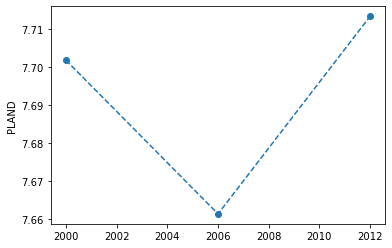

In [10]:
sta.plot_metric('proportion_of_landscape', class_val=1)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details, or [see above](available-metrics) the metrics that can be at each level.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

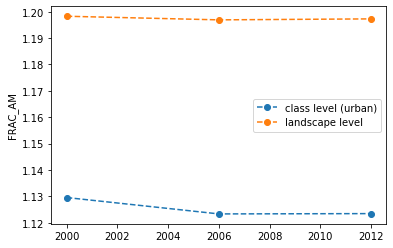

In [11]:
ax = sta.plot_metric('fractal_dimension_am', class_val=1, 
                     plot_kws={'label': 'class level (urban)'})
sta.plot_metric(
    'fractal_dimension_am', ax=ax, plot_kws={'label': 'landscape level'})
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalBufferAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/05-spatiotemporal-buffer-analysis.ipynb)